In [1]:
import pandas as pd
from scipy.stats import iqr

In [3]:
df = pd.read_csv("/home/colombelli/Documents/datasets/acgt/kidney/transposed_exp_log2_staging_match.csv", index_col=0)
df = df.T

In [20]:
iqr_th = 3
selected_cols = []

for col in df.columns:
    if iqr(df[col]) > iqr_th:
        selected_cols.append(col)

In [21]:
# counts:
# iqr > 0.6: 13848
# iqr > 1: 8419
# iqr > 2: 2281
# iqr > 3: 650
len(selected_cols)

650

In [25]:
reduced_df = df.loc[:, selected_cols].T
reduced_df

,TCGA.CJ.5672.11,TCGA.CJ.5678.11,TCGA.B0.5712.11,TCGA.CZ.5458.11,TCGA.CW.5580.11,TCGA.CZ.5463.11,TCGA.CZ.5469.11,TCGA.CZ.4864.11,TCGA.B8.5549.11,TCGA.B0.5701.11,...,TCGA.CJ.4638.01,TCGA.CJ.5677.01,TCGA.CJ.4887.01,TCGA.CZ.5987.01,TCGA.B4.5377.01,TCGA.B0.4819.01,TCGA.B0.4698.01,TCGA.B0.4712.01,TCGA.B2.5639.01,TCGA.CJ.4871.01
652919,4.760210,4.870084,0.000000,3.466040,5.383131,5.846894,6.691227,5.399701,5.017102,4.423108,...,1.284218,0.000000,2.556405,0.000000,6.600659,0.000000,4.548665,1.214747,1.653473,4.738768
26154,3.022403,4.385183,4.287295,1.945308,1.483364,1.824849,1.432051,3.382764,1.597174,3.472059,...,5.191409,5.720125,7.151221,8.615500,5.903361,5.913478,0.385597,9.180009,8.607801,8.924363
28,9.390329,5.953891,4.563298,8.099297,9.270594,6.272061,8.965811,8.882138,8.981129,8.312719,...,7.269689,2.953340,8.583463,5.616002,4.997690,3.432625,0.940505,5.678021,3.148674,4.250082
26,12.063644,12.566209,10.728579,13.133859,9.806887,9.839808,13.389341,13.310304,11.938865,10.464273,...,14.537551,14.489797,15.071666,11.594457,14.752841,11.362003,2.317044,12.289524,10.208726,8.779506
40,5.811021,5.771725,4.563298,6.450989,4.804265,4.842350,4.256626,3.870079,7.181373,4.653054,...,3.602861,1.930018,0.529971,1.246530,0.816395,3.616722,1.340277,4.524609,1.281312,5.380584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,8.327877,8.490122,0.000000,8.319150,0.000000,8.059922,8.493727,8.173977,8.758570,8.422929,...,0.000000,0.000000,8.210243,8.077061,0.000000,1.304277,7.655991,8.278706,8.667393,7.696046
79698,4.358727,2.727463,1.904773,3.219711,2.290218,3.200567,3.409187,2.050885,4.541044,2.413377,...,2.373286,5.750572,0.000000,4.722171,0.326192,1.565353,0.940505,0.911270,2.403759,4.631227
151126,8.656126,8.692213,8.222945,8.751733,8.851669,8.840492,8.248600,8.215255,8.682375,8.616942,...,2.555325,4.015881,7.308955,8.819945,5.590488,6.004358,4.602059,2.546882,9.497344,8.227909
163223,6.223614,5.238982,5.183320,5.277181,6.192579,6.558168,5.760556,4.386066,5.745848,4.967634,...,0.762902,0.643487,1.472696,0.000000,1.334625,3.061448,3.825277,0.526369,1.949049,1.341587


In [26]:
reduced_df.to_csv("/home/colombelli/Documents/datasets/acgt/kidney/correlation650.csv")

# Processment of methy and mirna data
### Subsample with only intersected patient, log2 normalized values, iqr dimensionality reduction

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def boxplot_df(df, include_outliers=True):
    x = sns.boxplot(data=df, showfliers = include_outliers)
    x.set(xticklabels=[])
    x.tick_params(bottom=False)
    x.set(xlabel=None)
    plt.show()
    return

def get_n(df, n):
    selected = df.sample(frac=1)
    try:
        return selected.iloc[:n, :]
    except:
        return selected

In [3]:
base = "/home/colombelli/Documents/datasets/acgt/kidney/"
df_exp = pd.read_csv(base+"transposed_exp_log2_staging_match.csv", index_col=0)
patients = df_exp.columns.values

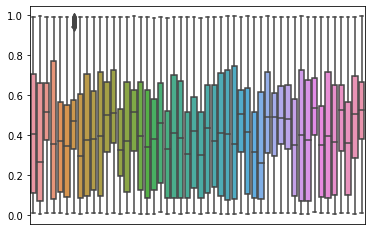

In [5]:
df_met = pd.read_csv(base+"methy", sep=' ', index_col=0)
boxplot_df(get_n(df_met.T, 50).T)

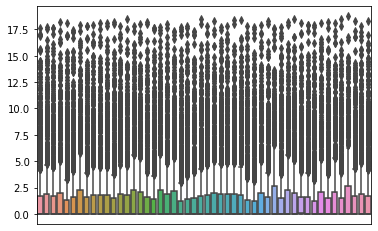

In [6]:
df_mirna = pd.read_csv(base+"mirna", sep=' ', index_col=0)
df_mirna = np.log2(df_mirna+1)
plotable_df = get_n(df_mirna.T, 50).T
boxplot_df(plotable_df)

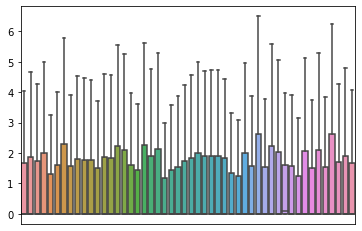

In [7]:
boxplot_df(plotable_df, include_outliers=False)

## Patients subsample

In [8]:
final_patients = set.intersection(set(patients), set(df_met.columns.values), set(df_mirna.columns.values))
len(final_patients)

201

In [9]:
df_exp = df_exp.loc[:, final_patients].T
df_met = df_met.loc[:, final_patients].T
df_mirna = df_mirna.loc[:, final_patients].T

## IQR reduction

In [10]:
def get_biggest_k_iqrs(df, k):
    
    iqrs = []
    for col in df.columns:
        iqrs.append((col, iqr(df[col])))
    
    iqrs.sort(reverse=True, key=lambda x: x[1])
    return [i[0] for i in iqrs[:k]]

In [11]:
k=500
selected_exp_features = get_biggest_k_iqrs(df_exp, k)

k=100
selected_met_features = get_biggest_k_iqrs(df_met, k)
selected_mirna_features = get_biggest_k_iqrs(df_mirna, k)

In [12]:
df_exp.loc[:, selected_exp_features].to_csv(base+"exp_top_500_iqr.csv")
df_exp.loc[:, selected_exp_features].T.to_csv(base+"correlation500.csv")

df_met.loc[:, selected_met_features].to_csv(base+"methy_top_100_iqr.csv")
df_mirna.loc[:, selected_mirna_features].to_csv(base+"mirna_top_100_iqr.csv")